In [143]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) 

df = pd.read_csv('movies.csv')

In [342]:
# Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actualyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [275]:
#Creating a deep copy 

df_copy = df.copy(deep=True)

In [276]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000
mean,2000.405451,6.387911,8.807403e+04,2.551350e+07,7.656567e+07,107.205660
std,11.153508,0.976862,1.633011e+05,3.858954e+07,1.641217e+08,18.737179
...,...,...,...,...,...,...
50%,2000.000000,6.500000,3.300000e+04,1.200000e+07,1.895543e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,3.200000e+07,7.262022e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [278]:
#Checking to see if there are any null values
df.isnull().sum()

name          0
rating        0
genre         0
             ..
company       0
runtime       0
actualyear    2
Length: 16, dtype: int64

In [279]:
df.isna().sum()

name          0
rating        0
genre         0
             ..
company       0
runtime       0
actualyear    2
Length: 16, dtype: int64

In [280]:
for temp in df.columns:
    pct_missing = np.mean(df[temp].isnull())
    print(f'{temp} - {pct_missing} %'.format())
    #print('{} - {} %'.format(temp,pct_missing))
    

name - 0.0 %
rating - 0.0 %
genre - 0.0 %
year - 0.0 %
released - 0.0 %
score - 0.0 %
votes - 0.0 %
director - 0.0 %
writer - 0.0 %
star - 0.0 %
country - 0.0 %
budget - 0.0 %
gross - 0.0 %
company - 0.0 %
runtime - 0.0 %
actualyear - 0.0002608242044861763 %


In [148]:
df['rating'] = df['rating'].fillna(0)
df['released'] = df['released'].fillna(0)
df['score'] = df['score'].fillna(0)
df['votes'] = df['votes'].fillna(0)
df['writer'] = df['writer'].fillna(0)
df['star'] = df['star'].fillna(0)
df['country'] = df['country'].fillna(0)
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
df['company'] = df['company'].fillna(0)
df['runtime'] = df['runtime'].fillna(0)

In [281]:
for temp in df.columns:
    pct_missing = np.mean(df[temp].isnull())
    print(f'{temp} - {pct_missing} %'.format())
    #print('{} - {} %'.format(temp,pct_missing))

name - 0.0 %
rating - 0.0 %
genre - 0.0 %
year - 0.0 %
released - 0.0 %
score - 0.0 %
votes - 0.0 %
director - 0.0 %
writer - 0.0 %
star - 0.0 %
country - 0.0 %
budget - 0.0 %
gross - 0.0 %
company - 0.0 %
runtime - 0.0 %
actualyear - 0.0002608242044861763 %


In [282]:
df.dtypes

name           object
rating         object
genre          object
               ...   
company        object
runtime       float64
actualyear     object
Length: 16, dtype: object

In [283]:
# Changed data type from float to int64
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [284]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actualyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020
7667,Tee em el,0,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0,2020


In [347]:
#Created Corrected year column

def extract_year(text):
    if isinstance(text, str):  # Check if the value is a string
        match = re.search(r'\b(\d{4})\b', text)
        if match:
            return match.group(1)
    return None  # Return None for non-string values or if no match found

# Apply the function to each row in the 'released' column
df['actualyear'] = df['released'].apply(extract_year)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actualyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


In [348]:
pd.set_option('display.max_rows', 20)

In [349]:
df.isnull().sum()

name          0
rating        0
genre         0
year          0
released      0
score         0
votes         0
director      0
writer        0
star          0
country       0
budget        0
gross         0
company       0
runtime       0
actualyear    2
dtype: int64

In [346]:
df['actualyear'].isnull().sum()

2

In [317]:
df['actualyear'].unique()

array(['1980', '1981', '1984', '1983', '1982', '1992', '1987', '1985',
       '1986', '1988', '1990', '1989', '2008', '1991', '1993', '1999',
       '2001', '2016', '1997', '1994', '1995', '1998', '2019', '1996',
       '2000', '2014', '2002', '2003', '2005', '2004', '2006', '2007',
       '2010', '2011', '2009', '2013', '2015', None, '2012', '2017',
       '2018', '2020'], dtype=object)

In [318]:
df['actualyear'].isna().sum()

2

In [319]:
#Dropping Not a Number in actualyear

df_clean = df[df['actualyear'].notna()]
df_clean.reset_index(drop=True, inplace=True)

In [320]:
df_clean['actualyear'].isna().sum()

0

In [321]:
df_clean = df_clean.sort_values(by=['gross'], inplace=False, ascending=False)

In [322]:
df_clean.tail(10)  # Last 10 rows

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actualyear
1184,Creepozoids,R,Horror,1987,"October 2, 1987 (United States)",4.0,2100,David DeCoteau,Dave Eisenstark,Linnea Quigley,United States,75000,0,Titan Productions,72.0,1987
1192,White of the Eye,R,Horror,1987,"June 19, 1987 (United Kingdom)",6.2,2200,Donald Cammell,China Kong,David Keith,United Kingdom,0,0,Mrs. White's Productions,110.0,1987
342,Sleepaway Camp,R,Horror,1983,"November 18, 1983 (United States)",6.3,28000,Robert Hiltzik,Robert Hiltzik,Felissa Rose,United States,350000,0,American Eagle Films,84.0,1983
329,The Personals,PG,Comedy,1982,October 1982 (United States),6.7,75,Peter Markle,Peter Markle,Bill Schoppert,United States,435000,0,Blueline Productions,90.0,1982
328,Experience Preferred... But Not Essential,PG,Drama,1982,"December 22, 1982 (United Kingdom)",7.0,240,Peter Duffell,June Roberts,Elizabeth Edmonds,United Kingdom,0,0,Channel Four Film,80.0,1982
327,Boardinghouse,R,Comedy,1982,"October 21, 1983 (United States)",3.8,651,John Wintergate,John Wintergate,John Wintergate,United States,10000,0,Blustarr,98.0,1983
326,Love Child,R,Crime,1982,"October 15, 1982 (United States)",5.7,253,Larry Peerce,Anne Gerard,Amy Madigan,United States,0,0,The Ladd Company,96.0,1982
324,The Wizard of Oz,Not Rated,Animation,1982,"October 6, 1982 (United States)",6.8,352,Fumihiko Takayama,Yoshimitsu Banno,Aileen Quinn,United States,0,0,Alan Enterprises,78.0,1982
1199,Walk Like a Man,PG,Comedy,1987,"April 17, 1987 (United States)",4.8,1400,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,Metro-Goldwyn-Mayer (MGM),86.0,1987
7665,Tee em el,0,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0,2020


In [323]:
##Dropping any duplicates if they exist

#If we need to drop the duplicate, code is as follows:
    #df['company] = df['company'].drop_duplicates() or df = df.drop_duplicates() for accross data frame

#df['company'].drop_duplicates().sort_values(ascending=False)

df_clean = df_clean.drop_duplicates()

In [324]:
df_clean.describe()

,year,score,votes,budget,gross,runtime
count,7666.000000,7666.000000,7.666000e+03,7.666000e+03,7.666000e+03,7666.000000
mean,2000.402948,6.388090,8.807131e+04,2.552016e+07,7.658564e+07,107.233629
std,11.153886,0.976925,1.633223e+05,3.859237e+07,1.641385e+08,18.659417
min,1980.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1991.000000,5.800000,9.100000e+03,0.000000e+00,3.875240e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,1.200000e+07,1.896672e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,3.200000e+07,7.262652e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [325]:
df_clean

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actualyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7443,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6661,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7242,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Boardinghouse,R,Comedy,1982,"October 21, 1983 (United States)",3.8,651,John Wintergate,John Wintergate,John Wintergate,United States,10000,0,Blustarr,98.0,1983
326,Love Child,R,Crime,1982,"October 15, 1982 (United States)",5.7,253,Larry Peerce,Anne Gerard,Amy Madigan,United States,0,0,The Ladd Company,96.0,1982
324,The Wizard of Oz,Not Rated,Animation,1982,"October 6, 1982 (United States)",6.8,352,Fumihiko Takayama,Yoshimitsu Banno,Aileen Quinn,United States,0,0,Alan Enterprises,78.0,1982
1199,Walk Like a Man,PG,Comedy,1987,"April 17, 1987 (United States)",4.8,1400,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,Metro-Goldwyn-Mayer (MGM),86.0,1987


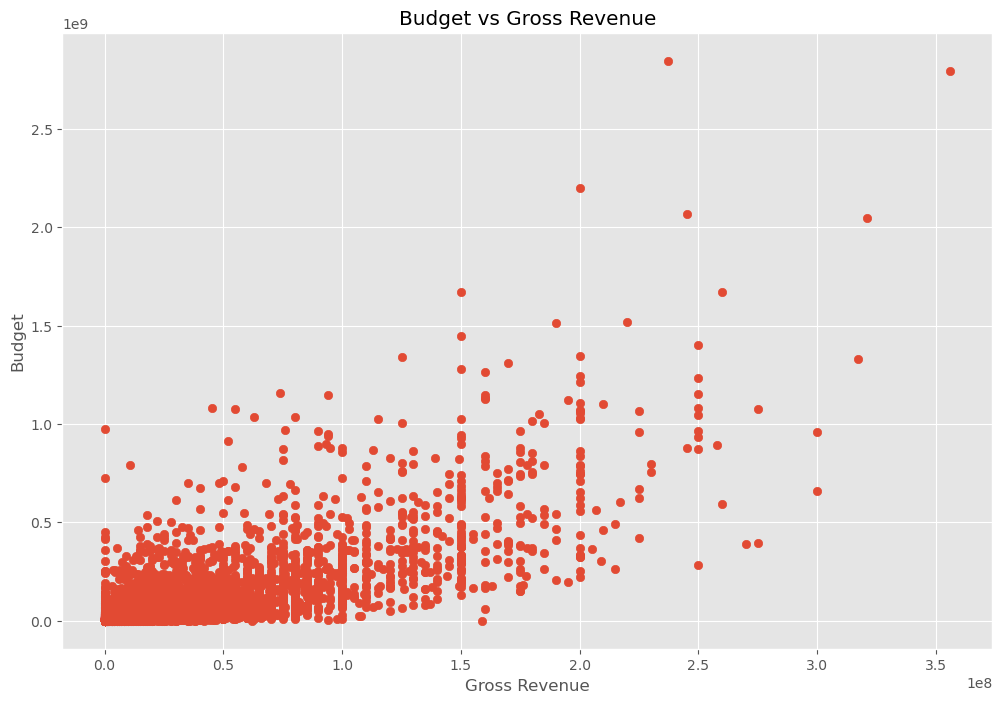

In [326]:
#Data exploration to seek any correlation in our data set

# Scatter plot with budget vs gross

plt.scatter(x=df_clean['budget'], y=df_clean['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel(xlabel = 'Gross Revenue')
plt.ylabel(ylabel ='Budget')
plt.show()

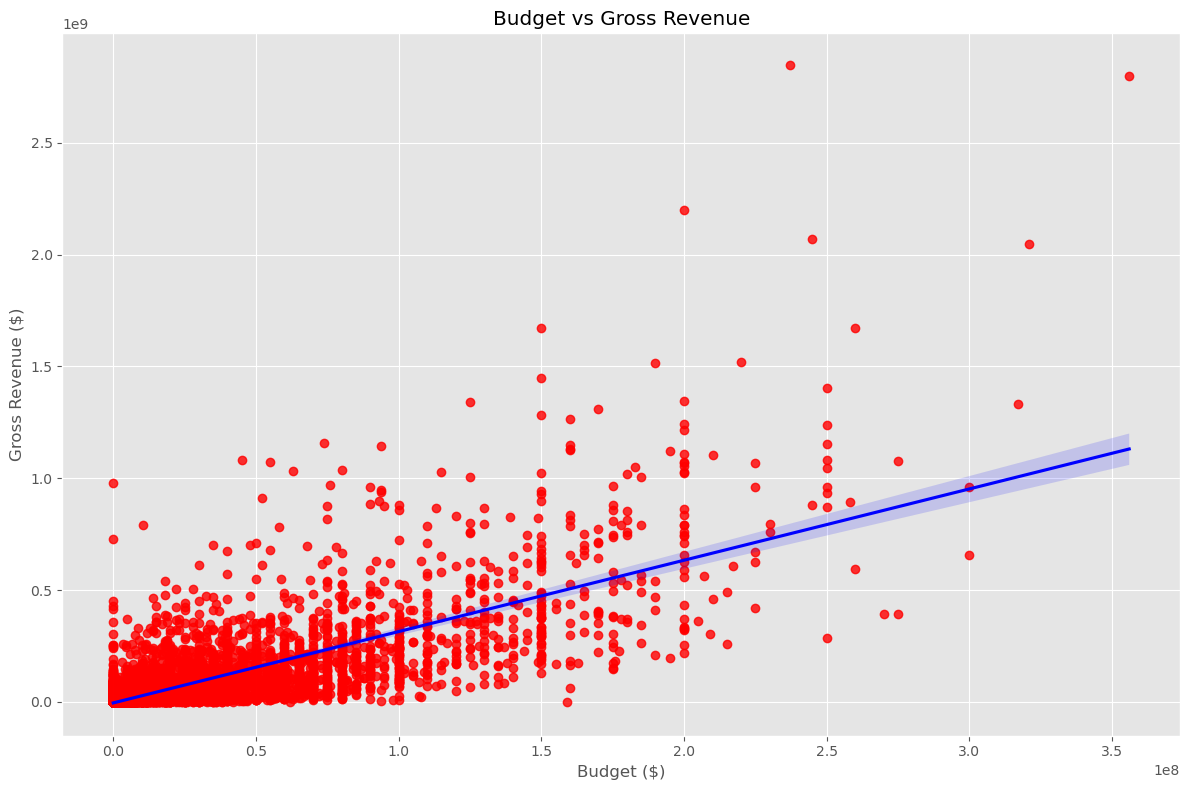

In [327]:
#Regression Plot

sns.regplot(
    x='budget', 
    y='gross', 
    data=df_clean, 
    scatter_kws={"color": "red"}, 
    line_kws={"color": "blue"}
)

plt.xlabel('Budget ($)')
plt.ylabel('Gross Revenue ($)')
plt.title('Budget vs Gross Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

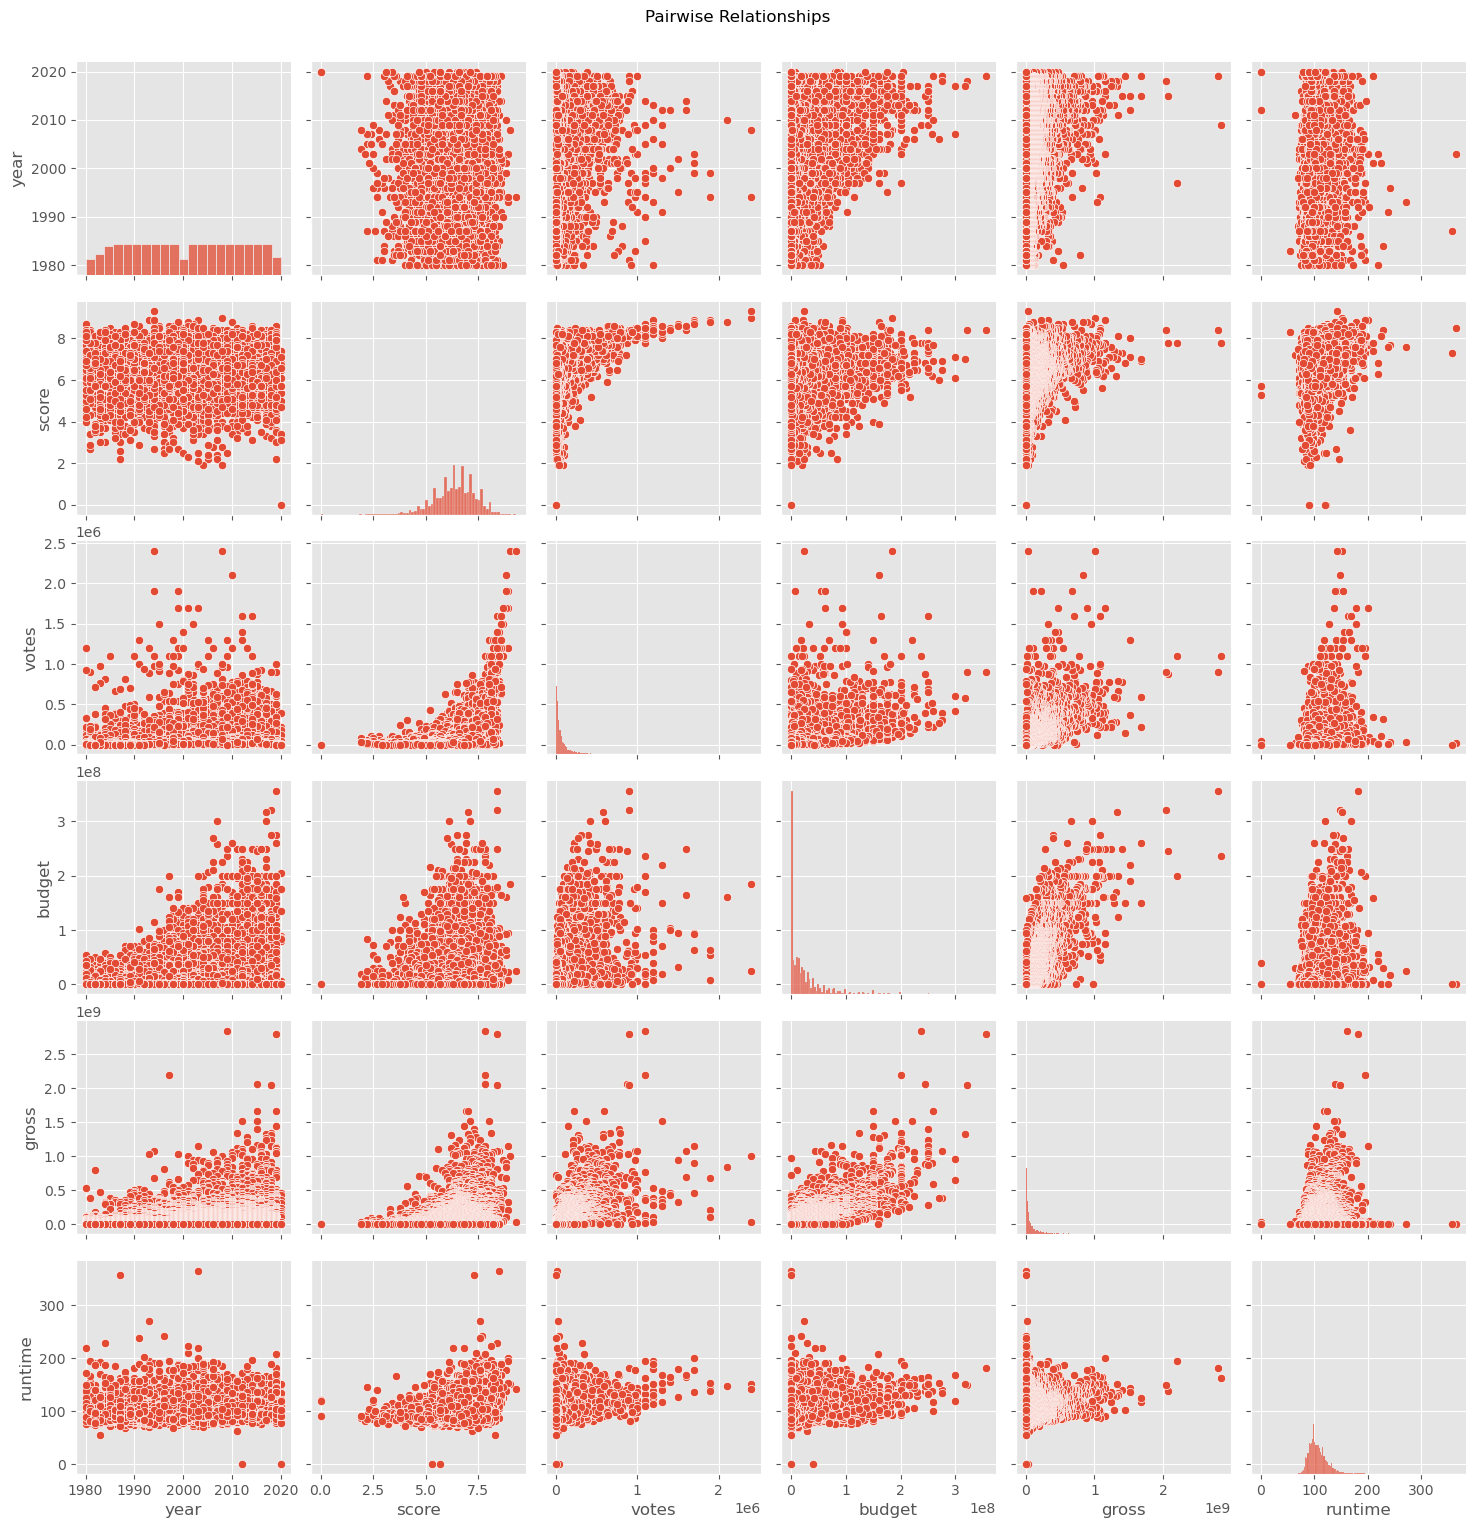

In [328]:
sns.pairplot(df_clean)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [329]:
numeric_df = df_clean.select_dtypes(include='number')
numeric_df.corr(method='pearson') #pearson, kendal, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092789,0.222434,0.309407,0.262038,0.118159
score,0.092789,1.000000,0.407139,0.056748,0.185944,0.395230
votes,0.222434,0.407139,1.000000,0.486970,0.632896,0.308399
budget,0.309407,0.056748,0.486970,1.000000,0.750141,0.268549
gross,0.262038,0.185944,0.632896,0.750141,1.000000,0.244697
runtime,0.118159,0.395230,0.308399,0.268549,0.244697,1.000000


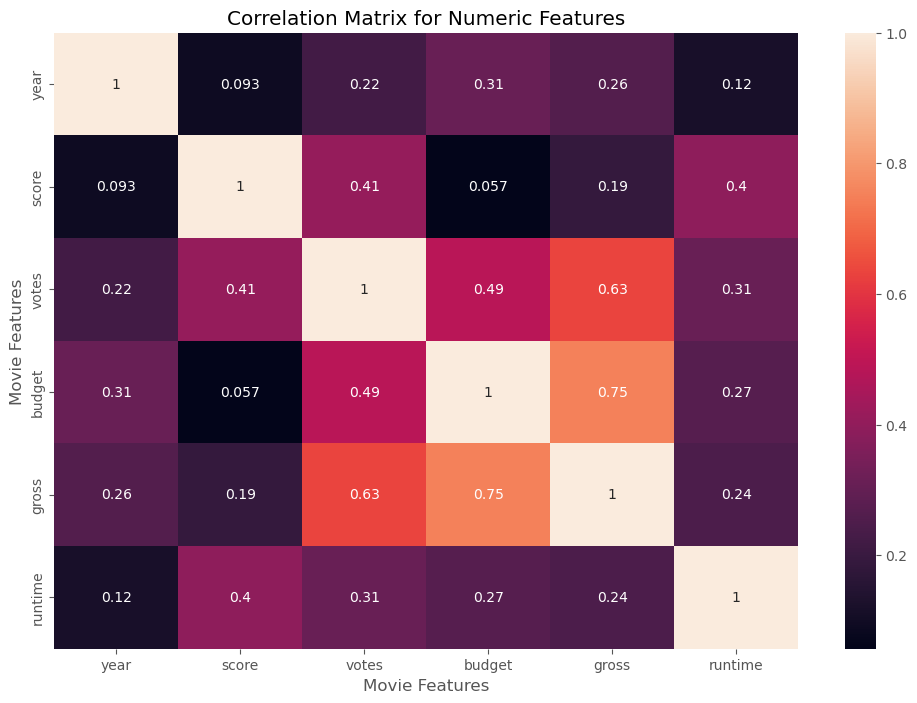

In [330]:
numeric_df = df_clean.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True) 

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

In [331]:
df_clean.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actualyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7443,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6661,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7242,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [332]:
df_numerized = df_clean.copy(deep=True)

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes 


In [333]:
df_numerized.dtypes.value_counts()

int16      6
int8       4
int64      4
float64    2
Name: count, dtype: int64

In [334]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actualyear
5445,533,6,0,2009,696,7.8,1100000,1155,1779,2335,56,237000000,2847246203,2254,162.0,29
7443,535,6,0,2019,183,8.4,903000,162,744,2242,56,356000000,2797501328,1607,181.0,39
3045,6894,6,6,1997,704,7.8,1100000,1155,1779,1596,56,200000000,2201647264,2254,194.0,17
6661,5143,6,0,2015,698,7.8,876000,1125,2551,525,56,245000000,2069521700,1541,138.0,35
7242,536,6,0,2018,192,8.4,897000,162,744,2242,56,321000000,2048359754,1607,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,860,7,4,1982,2934,3.8,651,1451,2217,1321,56,10000,0,441,98.0,3
326,3343,7,5,1982,2864,5.7,253,1656,266,105,56,0,0,2188,96.0,2
324,6789,4,2,1982,3073,6.8,352,903,4509,31,56,0,0,114,78.0,2
1199,7206,5,4,1987,83,4.8,1400,1877,3646,463,56,0,0,1638,86.0,7


In [335]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actualyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


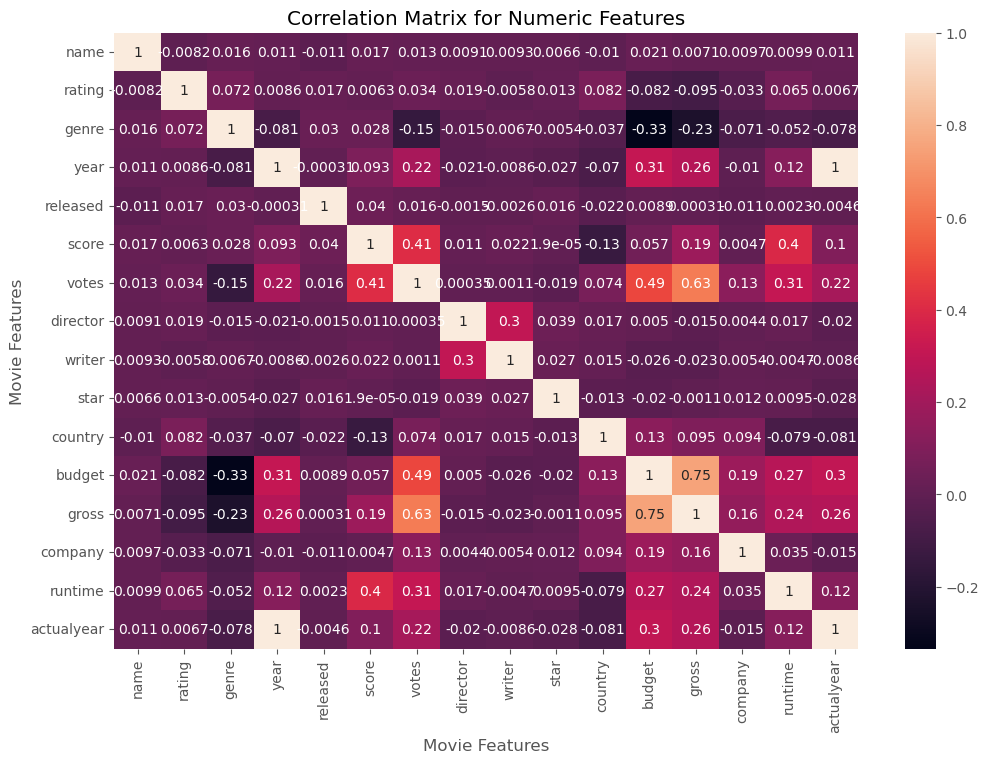

In [336]:
numeric_df = df_numerized.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True) 

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

In [341]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs 

name        name          1.000000
            rating       -0.008233
            genre         0.016173
            year          0.011245
            released     -0.010901
            score         0.016537
            votes         0.013019
            director      0.009111
            writer        0.009334
            star          0.006649
            country      -0.009955
            budget        0.020710
            gross         0.007101
            company       0.009702
            runtime       0.009908
            actualyear    0.010697
rating      name         -0.008233
            rating        1.000000
            genre         0.072315
            year          0.008631
            released      0.016917
            score         0.006314
            votes         0.033734
            director      0.019493
            writer       -0.005849
            star          0.013404
            country       0.081942
            budget       -0.081834
            gross   

In [355]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 300)

In [356]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget      genre        -0.333945
genre       budget       -0.333945
            gross        -0.234237
gross       genre        -0.234237
votes       genre        -0.145318
genre       votes        -0.145318
score       country      -0.134159
country     score        -0.134159
rating      gross        -0.095377
gross       rating       -0.095377
budget      rating       -0.081834
rating      budget       -0.081834
genre       year         -0.081426
year        genre        -0.081426
country     actualyear   -0.080844
actualyear  country      -0.080844
runtime     country      -0.078730
country     runtime      -0.078730
actualyear  genre        -0.077911
genre       actualyear   -0.077911
            company      -0.070755
company     genre        -0.070755
year        country      -0.070300
country     year         -0.070300
runtime     genre        -0.052131
genre       runtime      -0.052131
country     genre        -0.037085
genre       country      -0.037085
rating      company 

In [359]:
high_corr = sorted_pairs[(sorted_pairs > 0.40) & (sorted_pairs < 1.0)]

high_corr 

score       votes         0.407139
votes       score         0.407139
            budget        0.486970
budget      votes         0.486970
votes       gross         0.632896
gross       votes         0.632896
budget      gross         0.750141
gross       budget        0.750141
actualyear  year          0.997415
year        actualyear    0.997415
dtype: float64

In [ ]:
# Data Preparation
# Cleaned the dataset by removing rows with missing values in critical fields like actualyear.

# Converted categorical string columns (e.g., genre, director, company) into numeric codes using pandas' category encoding.

# Created a numerized DataFrame suitable for correlation analysis and modeling.

# Correlation Analysis
# Computed pairwise correlations between all numeric features.

# Filtered for strong positive correlations (> 0.40 and < 1.0) to highlight meaningful relationships.

# budget ↔ gross	0.750	Strong link — higher budgets tend to yield higher box office returns.